In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.float_format', '{:.0f}'.format)
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.read_excel("/kaggle/input/dataset/Banking Case - Data.xlsx")

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Variable,Description,Data Type
1,NaN,Customer_number,Unique Customer Identification number,ID
2,NaN,Acc_creation_date,Account opening date,Date
3,NaN,Insurance,Has the customer taken insurance?,Categorical
4,NaN,balance,NaN,Numeric
5,NaN,housing,Has the customer taken housing loan?,Categorical
6,NaN,loan,Has the customer taken personal loan?,Categorical
7,NaN,contact,Contact communication type,Categorical
8,NaN,duration,Duration of call with the customer for Term loan,Numeric
9,NaN,campaign,Number of contacts performed during this campa...,Numeric


In [3]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual name of your Excel file
excel_file = pd.ExcelFile('/kaggle/input/dataset/Banking Case - Data.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = excel_file.sheet_names

# Create a dictionary to store DataFrames
dataframes = {sheet_name: excel_file.parse(sheet_name) for sheet_name in sheet_names}

for sheet_name, df in dataframes.items():
    print(f"\nContents of sheet '{sheet_name}'")


Contents of sheet 'Data Dictionary'

Contents of sheet 'Transaction Data'

Contents of sheet 'Customer Demographics'


In [4]:
df_transaction = dataframes['Transaction Data']
df_demo = dataframes['Customer Demographics']

In [5]:
df_transaction.head()

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,0,1001,no,2143,yes,no,NaN,261,1,2,0,unknown,no,351
1,1,1002,no,29,yes,no,unknown,151,1,2,0,unknown,no,326
2,2,1003,no,2,yes,yes,unknown,76,1,2,0,NaN,no,422
3,3,1004,no,1506,yes,no,unknown,92,1,2,0,unknown,no,113
4,4,1005,no,1,no,no,unknown,198,1,2,0,unknown,no,342


In [6]:
df = pd.merge(df_transaction,df_demo,on = "Customer_number")

In [7]:
df

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143,yes,no,NaN,261,1,2,0,unknown,no,351,58,management,married,tertiary,839368,M
1,1,1002,no,29,yes,no,unknown,151,1,2,0,unknown,no,326,44,technician,single,secondary,1452858,M
2,2,1003,no,2,yes,yes,unknown,76,1,2,0,NaN,no,422,33,entrepreneur,married,NaN,4851383,F
3,3,1004,no,1506,yes,no,unknown,92,1,2,0,unknown,no,113,47,blue collar,married,unknown,3207754,F
4,4,1005,no,1,no,no,unknown,198,1,2,0,unknown,no,342,33,unknown,single,unknown,2562322,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,46207,no,825,no,no,cellular,0,0,-1,0,unknown,yes,152,51,technician,married,tertiary,2229818,M
45207,45207,46208,no,1729,no,no,cellular,0,0,-1,0,unknown,yes,334,121,retired,divorced,primary,2783556,M
45208,45208,46209,no,5715,no,no,cellular,1127,5,184,3,success,yes,381,72,retired,married,secondary,443512,M
45209,45209,46210,no,668,no,no,telephone,0,0,-1,0,unknown,no,211,57,blue-collar,married,secondary,4193684,F


In [8]:
df.describe()

,Sno,Customer_number,duration,campaign,last_contact_day,previous,Count_Txn,age
count,45211,45211,45172,45211,45211,45211,45210,45211
mean,22605,23606,258,3,42,1,300,41
std,13051,13051,258,3,99,2,116,11
min,0,1001,-167,0,-9,0,-423,18
25%,11302,12304,103,1,1,0,200,33
50%,22605,23606,180,2,1,0,300,39
75%,33908,34908,319,3,1,0,400,48
max,45210,46211,4918,63,871,275,499,121


In [9]:
df = df.drop(columns = ["Sno","Customer_number"],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Insurance         45211 non-null  object 
 1   balance           45156 non-null  object 
 2   housing           45211 non-null  object 
 3   loan              45203 non-null  object 
 4   contact           45168 non-null  object 
 5   duration          45172 non-null  float64
 6   campaign          45211 non-null  int64  
 7   last_contact_day  45211 non-null  int64  
 8   previous          45211 non-null  int64  
 9   poutcome          45196 non-null  object 
 10  Term Deposit      45203 non-null  object 
 11  Count_Txn         45210 non-null  float64
 12  age               45211 non-null  int64  
 13  job               45198 non-null  object 
 14  marital           45193 non-null  object 
 15  education         45190 non-null  object 
 16  Annual Income     45194 non-null  object

We can see that there is null values in Term Deposit which is our target values. So, lets remove the null rows

In [11]:
df = df.dropna(subset=['Term Deposit'])

In [12]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender


## Univariate analyis

### Categorical analysis

#### 1. Insurance

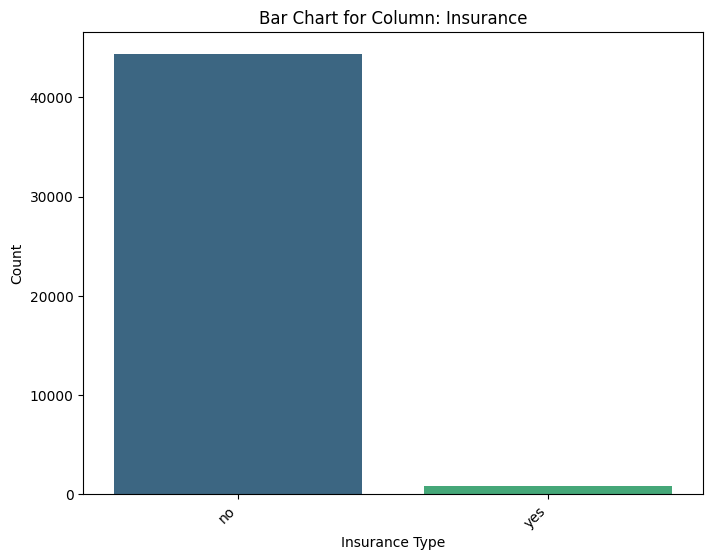

In [13]:
data = df['Insurance'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 2. Housing

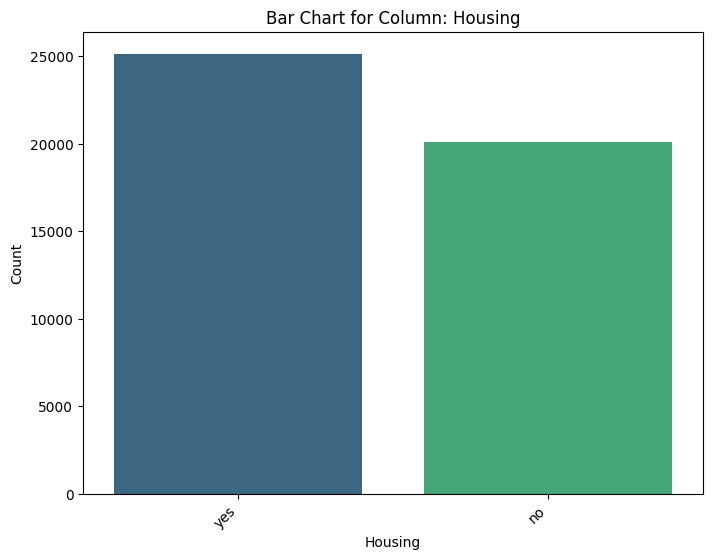

In [14]:
data = df['housing'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 3.Loan

In [15]:
df["loan"].isnull().sum()

8

In [16]:
df["loan"].value_counts()

loan
no     37951
yes     7244
Name: count, dtype: int64

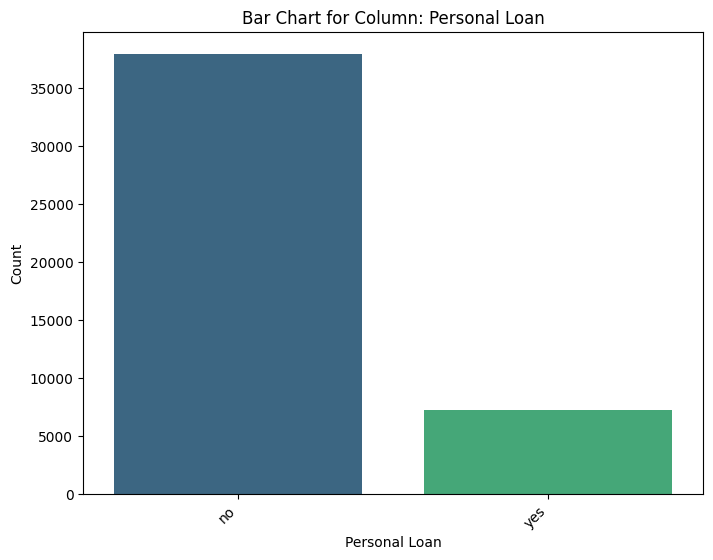

In [17]:
data = df['loan'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### 4.Contact

In [18]:
df["contact"].value_counts()

contact
cellular     29282
unknown      12963
telephone     2850
Mobile          29
Tel             20
?               17
Name: count, dtype: int64

In [19]:
df.loc[:,'contact'] = df['contact'].replace({'Mobile': 'cellular', 'Tel': 'telephone','?':'unknown'})

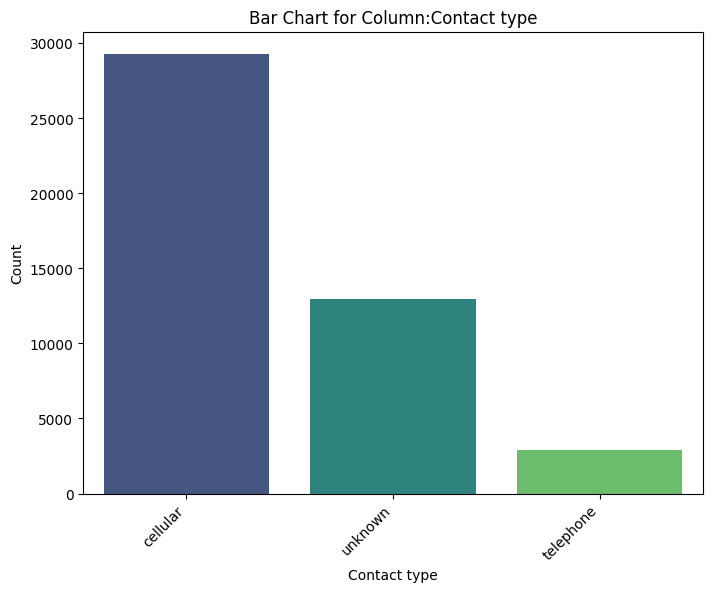

In [20]:
data = df['contact'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column:Contact type')
plt.xlabel('Contact type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

There are null values. Lets set them to unknown

In [21]:
df.loc[:,'contact'] = df['contact'].fillna("unknown")

#### 5. Poutcome

In [22]:
df["poutcome"].value_counts()

poutcome
unknown    36876
failure     4901
other       1840
success     1511
pending       55
?              4
????           1
Name: count, dtype: int64

In [23]:
df.loc[:,'poutcome'] = df['poutcome'].replace({'?': 'unknown', '????': 'unknown', 'pending': 'unknown'})

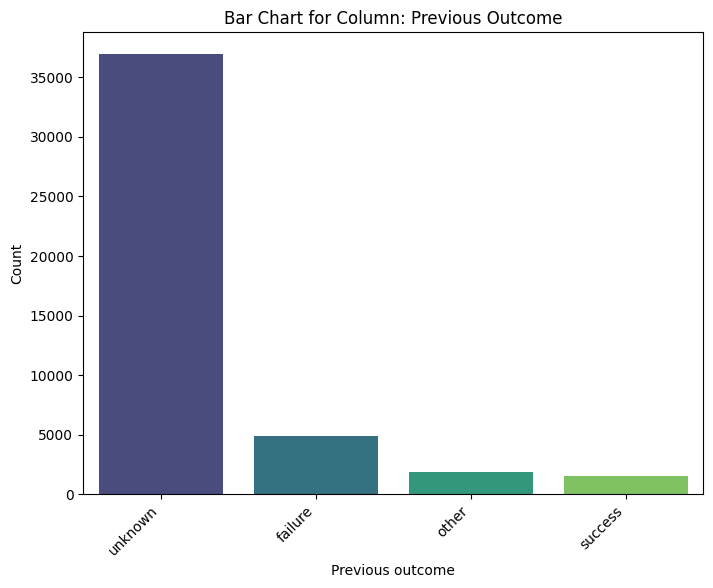

In [24]:
data = df['poutcome'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Previous Outcome')
plt.xlabel('Previous outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [25]:
df.loc[:,'poutcome'] = df['poutcome'].fillna("unknown")

#### 6. Term Deposit - Target

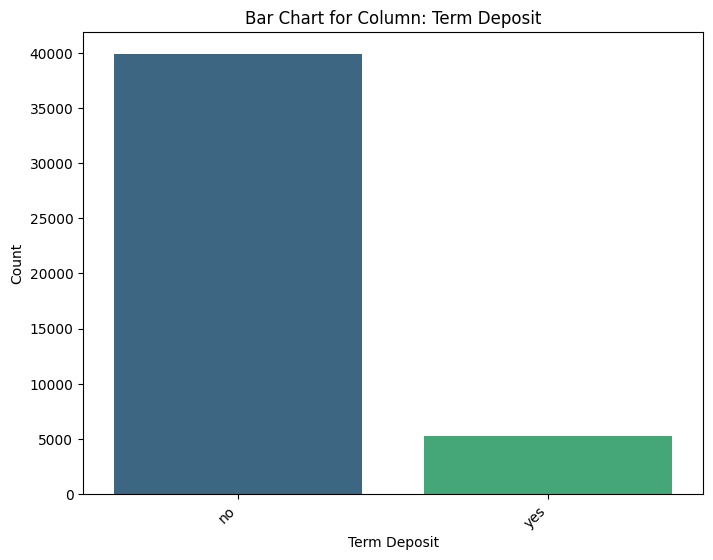

In [26]:
data = df['Term Deposit'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Term Deposit')
plt.xlabel('Term Deposit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 7.Job

In [27]:
df["job"].value_counts()

job
blue-collar      9621
management       9454
technician       7593
admin.           5171
services         4150
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1302
housemaid        1240
student           938
unknown           288
blue collar       104
Name: count, dtype: int64

In [28]:
df.loc[:, 'job'] = df['job'].replace({'blue collar': 'blue-collar', '????': 'unknown'})

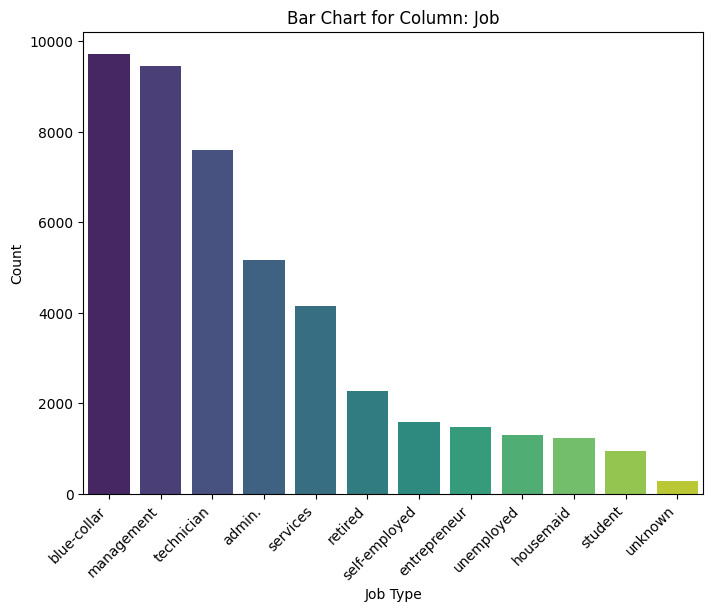

In [29]:
data = df['job'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Job')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 8. Marital status

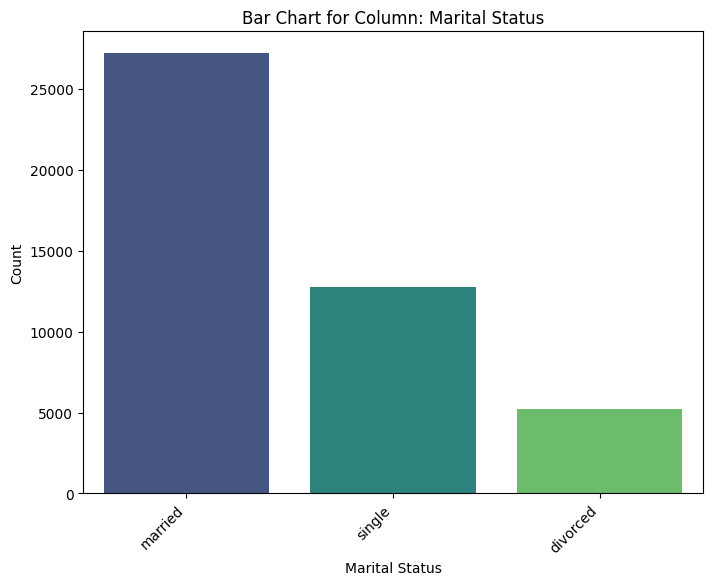

In [30]:
data = df['marital'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 9. Education

In [31]:
df["education"].value_counts()

education
secondary    23181
tertiary     13295
primary       6845
unknown       1856
Primary          3
ter tiary        2
Name: count, dtype: int64

In [32]:
df.loc[:,'education'] = df['education'].str.lower().str.strip().replace({'pri mary': 'primary','ter tiary': 'tertiary'})

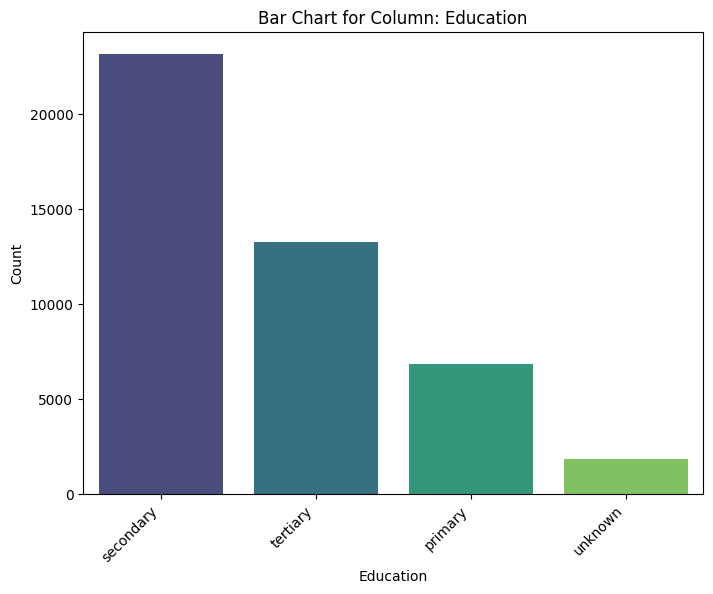

In [33]:
data = df['education'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 10. Gender

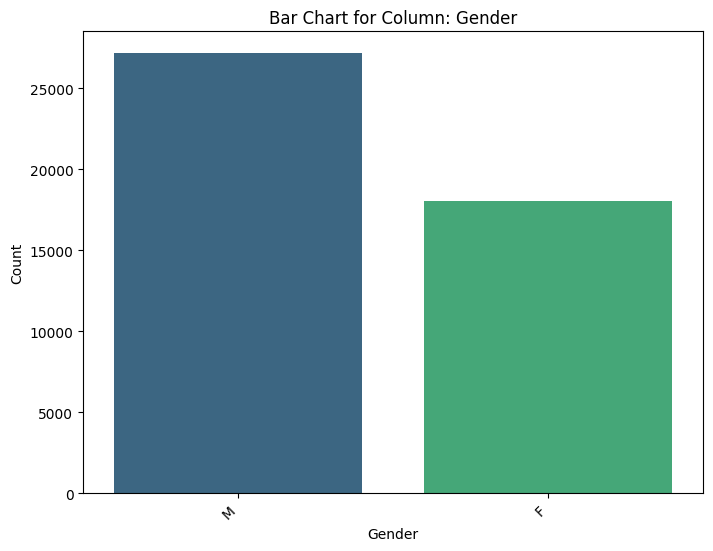

In [34]:
data = df['Gender'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### Univariate Numerical analysis

#### 1. Balance

In [35]:
df.loc[:,'balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)

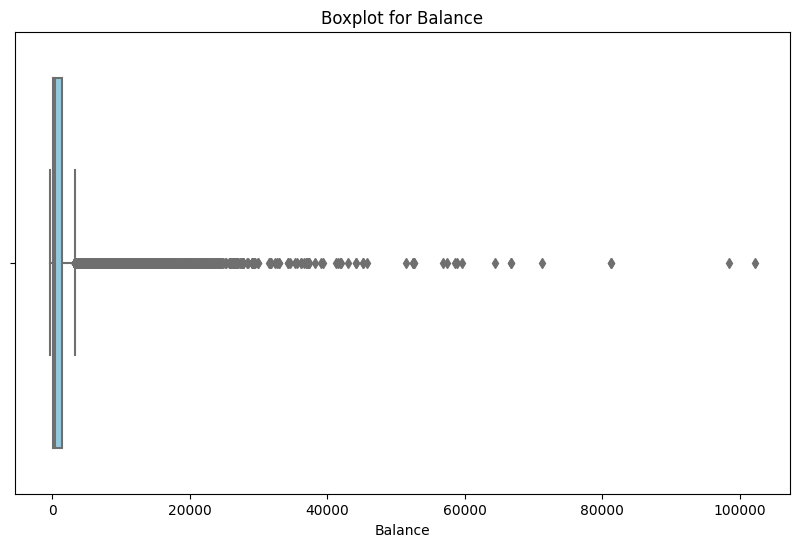

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='balance', data=df, color='skyblue')
plt.title('Boxplot for Balance')
plt.xlabel('Balance')
plt.show()

In [37]:
negative_balance_rows = df[df['balance'] < 0]
negative_balance_rows

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
44469,no,-32,no,yes,cellular,366,2,178,9,success,yes,366,35,admin.,single,secondary,212193,F
44541,no,-62,no,no,unknown,17,1,1,0,unknown,no,147,28,management,single,tertiary,211055,M
44566,no,-52,no,no,unknown,12,1,1,0,unknown,no,382,34,services,married,secondary,210478,M
44578,no,-280,no,no,unknown,6,1,1,0,unknown,no,100,36,entrepreneur,married,secondary,210026,M
44626,no,-205,no,no,cellular,481,1,579,1,failure,yes,353,31,services,single,secondary,208226,F


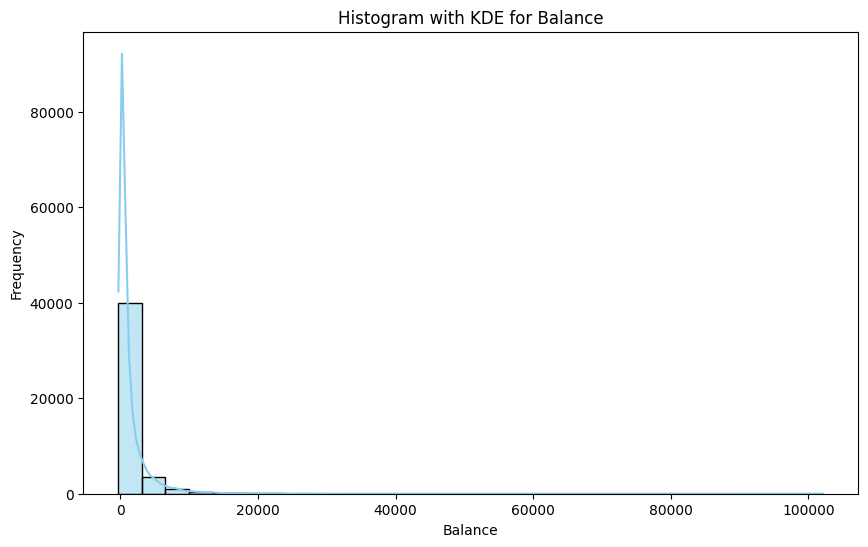

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, color='skyblue', bins=30)
plt.title('Histogram with KDE for Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Fill NaN values with 0 in the 'balance' column
df['balance'].fillna(0, inplace=True)

# Replace entire rows with 0 where 'balance' column contains '/' or '?'
df.loc[df['balance'].astype(str).str.contains(r'/|\?'), :] = 0

# Convert 'balance' column to integer
df['balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)

# Filter rows where 'balance' is equal to 0 or less than 0 and count the values
zero_balance_rows = df[(df['balance'] == 0) | (df['balance'] < 0)]['balance'].count()
zero_balance_rows

3600

We can see that 3600 accounts of 45211 has a balance of 0 and less than 0 in their accounts

In [40]:
df["balance"].describe()

count    45203
mean      1415
std       3021
min       -280
25%        136
50%        484
75%       1435
max     102127
Name: balance, dtype: float64

In [41]:
df['balance'].isnull().sum()

0

#### 2. Duration

In [42]:
df["duration"].describe()

count   45164
mean      258
std       258
min      -167
25%       103
50%       180
75%       319
max      4918
Name: duration, dtype: float64

We can see that the duration contains negative values. The duration represents the call duration between agent and customer. It cant be 0. It must be a error. The - must be added by mistake so lets remove it.

In [43]:
df.loc[:,'duration'] = df['duration'].abs()

In [44]:
df.loc[:,"duration"] = df['duration'].fillna(0)

#### Campaign

In [45]:
df['campaign'].describe()

count   45203
mean        3
std         3
min         0
25%         1
50%         2
75%         3
max        63
Name: campaign, dtype: float64

We can see that maximum phone call made to a customer is 63.

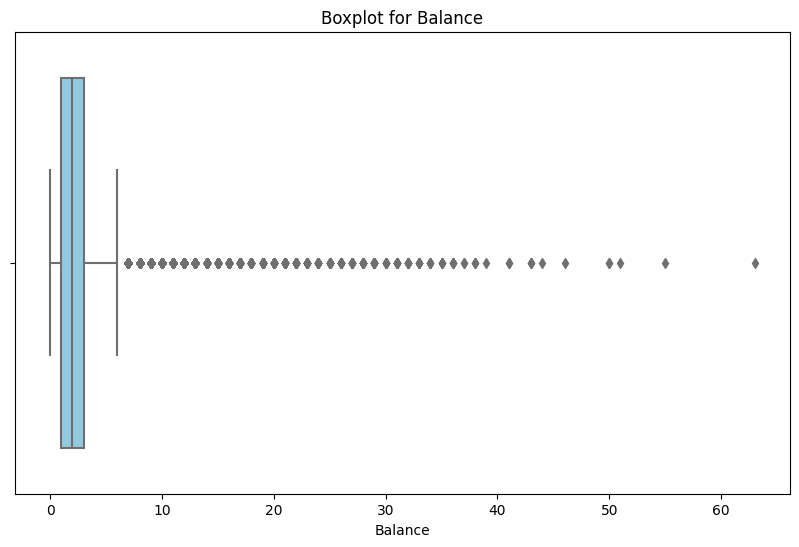

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='campaign', data=df, color='skyblue')
plt.title('Boxplot for Balance')
plt.xlabel('Balance')
plt.show()

#### Last Contact day

In [47]:
df['last_contact_day'].describe()

count   45203
mean       42
std        99
min        -9
25%         1
50%         1
75%         1
max       871
Name: last_contact_day, dtype: float64

Last contact day - Number of days that passed by after the client was last contacted from a previous campaign.
-1 implies the customer was not contacted. But we have -9 and so. Lets assume that they are errors and change to positive value other than -1.

In [48]:
df.loc[:,'last_contact_day'] = np.where(df['last_contact_day'] < -1, abs(df['last_contact_day']), df['last_contact_day'])

#### Previous - Number of contacts performed before this campaign and for this client 

In [49]:
df['previous'].describe()

count   45203
mean        1
std         2
min         0
25%         0
50%         0
75%         0
max       275
Name: previous, dtype: float64

In [50]:
df.loc[:,'previous'] = df['previous'].astype(int)

#### Count_txn : Number of Transactions Done by the customer

In [51]:
df['Count_Txn'].describe()

count   45202
mean      300
std       116
min      -423
25%       200
50%       300
75%       400
max       499
Name: Count_Txn, dtype: float64

The count cannot be negative. So, lets assume that they are typing errors and take absolute values

In [52]:
df.loc[:,'Count_Txn'] = df['Count_Txn'].abs()

In [53]:
df['Count_Txn'] = df['Count_Txn'].fillna(df['Count_Txn'].median())

#### Age

In [54]:
df['age'].describe()

count   45203
mean       41
std        11
min        18
25%        33
50%        39
75%        48
max       121
Name: age, dtype: float64

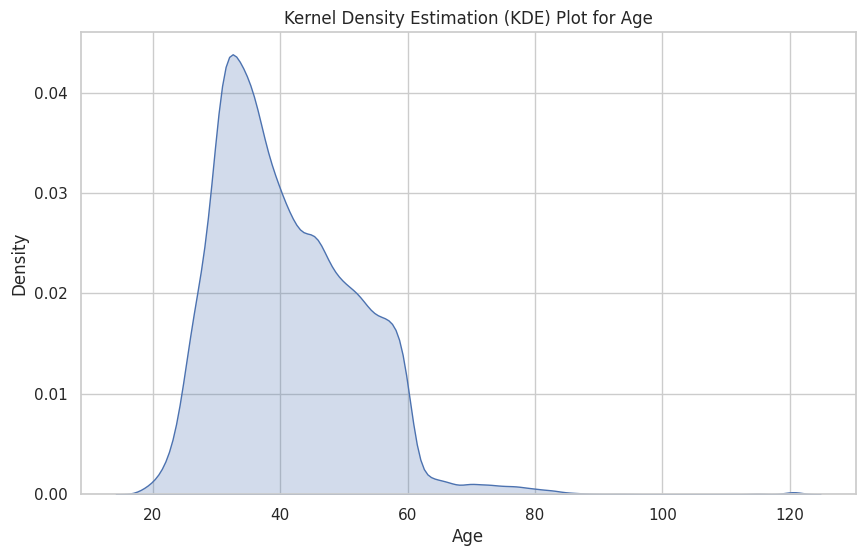

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create KDE plot for 'age' column
sns.kdeplot(data=df, x='age', fill=True, palette="crest")

plt.title('Kernel Density Estimation (KDE) Plot for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [56]:
# There seems to spike in the 120 so lets see what is the problem
top_ages = df['age'].nlargest(60)
top_ages

40789    121
40957    121
40972    121
41237    121
41242    121
41515    121
41599    121
41615    121
42197    121
42333    121
42747    121
42914    121
43142    121
43268    121
43915    121
44095    121
44932    121
45207    121
29464    120
31119    120
31919    120
33849    120
40622    120
41041    120
42025    120
42534    120
42864    120
43197    120
44396    120
44403    120
44786    120
45195    120
31723    115
32802    115
33710    115
33815    115
40383    115
40471    115
40526    115
40586    115
33699     95
41663     95
31233     94
44262     93
44420     93
41934     92
42727     92
31069     90
43194     90
41162     89
42574     89
44892     89
44669     88
44794     88
41923     87
42081     87
42494     87
42635     87
32105     86
41291     86
Name: age, dtype: int64

There seems to be logical mistake. It may be typing error it may be 21 typed as 121. so lets quick check. In middle east, the personal loan can be taken till 65. so lets check whether the unrealistic age customers has taken the loan, if so it may be typing error and lets cap it randomly to 75 to 95.

In [57]:
result_df = df[(df['age'] > 90) & (df['loan'] == 'yes') & (df['housing'] == 'yes')]
result_df

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender


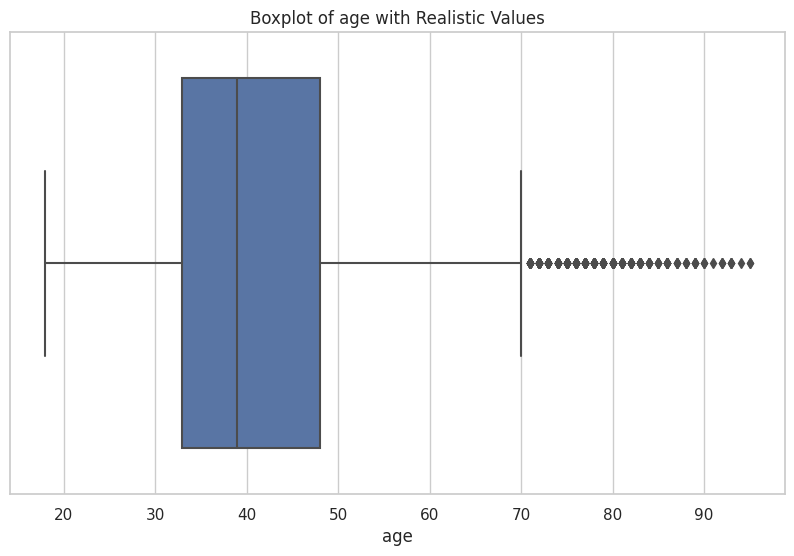

In [58]:
column_name = 'age'

# Set the upper limit for the more reasonable range
upper_limit = 95

# Identify and replace unrealistic values
unrealistic_values = df[df[column_name] > upper_limit][column_name]
df.loc[unrealistic_values.index, column_name] = np.random.randint(75, upper_limit, size=len(unrealistic_values))

# Create a boxplot to visualize the updated values
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name} with Realistic Values')
plt.show()

#### Annual Income

In [59]:
df["Annual Income"].describe()

count       45186
unique      44964
top       1380371
freq            3
Name: Annual Income, dtype: int64

In [60]:
df.loc[:,'Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce').fillna(0).astype(int)

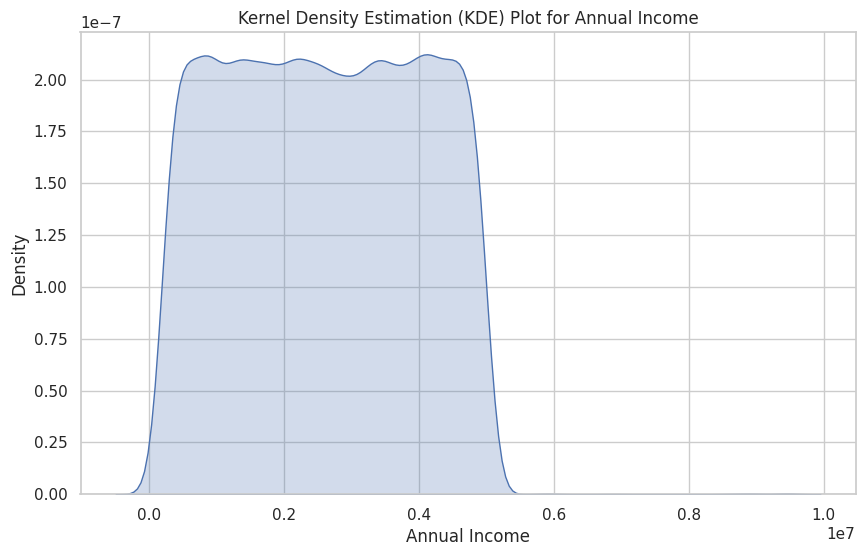

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create KDE plot for 'age' column
sns.kdeplot(data=df, x='Annual Income', fill=True, palette="crest")

plt.title('Kernel Density Estimation (KDE) Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()

In [62]:
df[df['Annual Income'] <= 0].count()

Insurance           18
balance             18
housing             18
loan                18
contact             18
duration            18
campaign            18
last_contact_day    18
previous            18
poutcome            18
Term Deposit        18
Count_Txn           18
age                 18
job                 18
marital             18
education           18
Annual Income       18
Gender              18
dtype: int64

In [63]:
filtered_df = df[df['Annual Income'] <= 0]
filtered_df

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
7,yes,2,yes,no,unknown,380,1,2,0,unknown,no,108,42,entrepreneur,divorced,tertiary,0,F
14,no,162,yes,no,unknown,174,1,3,0,unknown,no,186,57,services,married,secondary,0,M
23,no,50,yes,no,unknown,342,1,3,0,unknown,no,426,25,services,married,secondary,0,M
4993,no,170,yes,yes,unknown,492,1,1,0,unknown,no,469,28,admin.,married,secondary,0,M
5040,no,722,yes,no,unknown,150,1,1,0,unknown,no,405,28,blue-collar,single,primary,0,M
5335,no,2549,yes,no,unknown,246,3,1,0,unknown,no,413,32,blue-collar,married,secondary,0,F
5350,no,253,yes,no,unknown,160,2,1,0,unknown,no,418,30,blue-collar,married,secondary,0,M
5412,no,205,yes,no,unknown,147,14,1,0,unknown,no,293,35,blue-collar,married,unknown,0,F
5513,no,1049,yes,no,unknown,25,14,1,0,unknown,no,207,34,admin.,married,secondary,0,F
5565,no,97,yes,no,unknown,95,14,1,0,unknown,no,146,44,blue-collar,single,primary,0,M


The term blue-collar worker refers to individuals who engage in hard manual labor, typically in the agriculture, manufacturing, construction, mining, or maintenance sectors. Here most of the people who get 0 Annual Income is blue-collar workers

# Bivariate analysis

### Insurance vs Term Deposit

Lets see the relationship between Insurance and Term Deposit

In [64]:
pivot_table = pd.crosstab(df['Insurance'], df['Term Deposit'])
pivot_table

Term Deposit,no,yes
Insurance,,
no,39151,5237
yes,763,52


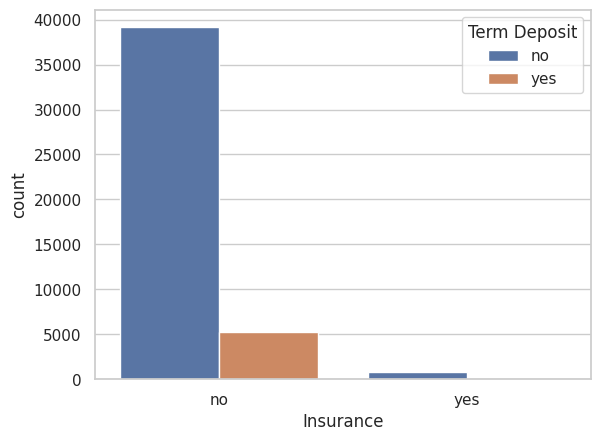

In [65]:
sns.countplot(x='Insurance', hue='Term Deposit', data=df)
plt.show()

The majority of customers do not have insurance and do not have a term deposit. there is a small number of people who have insurance but do not have a term deposit This suggests that there is a negative correlation between having insurance and having a term deposit, meaning that people who have insurance are less likely to have a term deposit, and vice versa

### Balance vs Term Deposit

In [66]:
pivot_table = df.pivot_table(index='Term Deposit', values='balance', aggfunc='median').reset_index()

# Display the pivot table
print("Pivot Table:")
print(pivot_table)

Pivot Table:
  Term Deposit  balance
0           no      458
1          yes      752


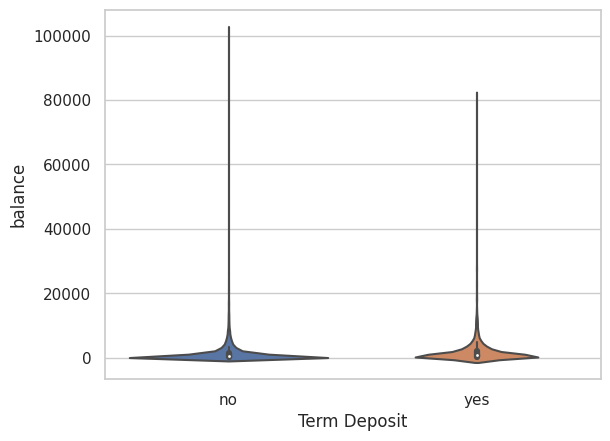

In [67]:
sns.violinplot(x='Term Deposit', y='balance', data=df)
plt.show()

### Age and Term Deposit

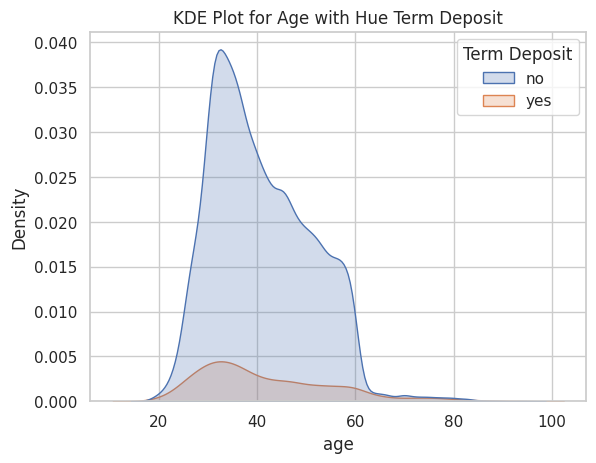

In [68]:
sns.kdeplot(x='age', hue='Term Deposit', data=df, fill=True)
plt.title('KDE Plot for Age with Hue Term Deposit')
plt.show()

As the age increases, people tend to have the term deposit increases. Lets take a threshold 65 and calculate percentage of people having term deposit.

In [69]:
threshold = 60
above_threshold = df[df['age'] >= threshold]
percentage_with_term_deposit = (above_threshold['Term Deposit'] == 'yes').mean() * 100
percentage_with_term_deposit

33.6322869955157

Thus 33 % of the people who are greater than 65 have a Term deposit

#### Job vs Term Deposit

In [70]:
crosstab_table_percentage = pd.crosstab(df['job'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
job,,
admin.,88,12
blue-collar,93,7
entrepreneur,92,8
housemaid,91,9
management,86,14
retired,77,23
self-employed,88,12
services,91,9
student,71,29


This confirms our findings that oldage people tends to take Term Deposit. After Retired, next Students, admin and Unemployed people tends to take Term Deposit. People less likely to take Term Deposit are services.

#### Marital vs Term Deposit

In [71]:
crosstab_table_percentage = pd.crosstab(df['marital'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
marital,,
divorced,88,12
married,90,10
single,85,15


The single customers tend to take Term Deposit more likely

### Education vs Term Deposit

In [72]:
crosstab_table_percentage = pd.crosstab(df['education'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
education,,
primary,91,9
secondary,89,11
tertiary,85,15
unknown,86,14


sdgs

### Gender vs Term Deposit

Both male and female are likely have same percentage to take a term deposit

In [73]:
crosstab_table_percentage = pd.crosstab(df['Gender'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
Gender,,
F,88,12
M,89,11


#### Duration vs Term Deposit

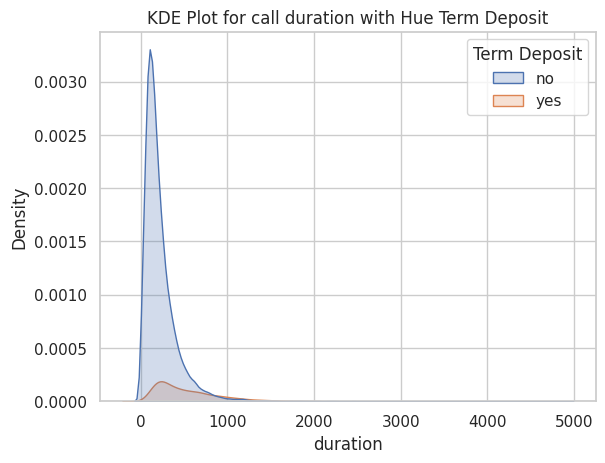

In [74]:
sns.kdeplot(x='duration', hue='Term Deposit', data=df, fill=True)
plt.title('KDE Plot for call duration with Hue Term Deposit')
plt.show()

In [75]:
pivot_table = df.pivot_table(index='Term Deposit', values='duration', aggfunc='median').reset_index()

# Display the pivot table
print("Pivot Table:")
pivot_table

Pivot Table:


,Term Deposit,duration
0,no,164
1,yes,426


When we call them and tend to convience them to take a term deposit.it tend to be true

### Previous outcome vs Current outcome

In [76]:
crosstab_table_percentage = pd.crosstab(df['poutcome'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
poutcome,,
failure,87,13
other,83,17
success,35,65
unknown,91,9


inference....

### Count_Txn vs Term Deposit

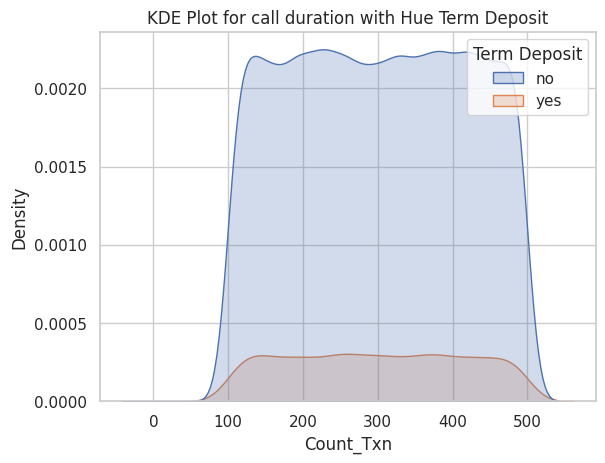

In [77]:
sns.kdeplot(x='Count_Txn', hue='Term Deposit', data=df, fill=True)
plt.title('KDE Plot for call duration with Hue Term Deposit')
plt.show()

In [78]:
pivot_table = df.pivot_table(index='Term Deposit', values='Count_Txn', aggfunc='median').reset_index()

# Display the pivot table
print("Pivot Table:")
pivot_table

Pivot Table:


,Term Deposit,Count_Txn
0,no,300
1,yes,298


The no of transaction doesnt have any effect on the term deposit marketing

# Analysis Questions

## 1. Income Insights:
#### How many customers have no annual income? Plot and present the data distribution of these customers.


## 2. Loan-less Customers Profile:
#### Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?

## 4. Communication Strategy Insights:
#### Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.



## 5. Age and Home Loans:
#### Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.


## 6. Income and Age Relationship:
#### Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.

# Feature Engineering

# Predictive Model Building:
Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present the model's performance metrics on both the train and test datasets.


In [79]:
df.isnull().sum()

Insurance            0
balance              0
housing              0
loan                 8
contact              0
duration             0
campaign             0
last_contact_day     0
previous             0
poutcome             0
Term Deposit         0
Count_Txn            0
age                  0
job                 13
marital             18
education           21
Annual Income        0
Gender               0
dtype: int64

In [80]:
num_feat=[x for x in df.columns if df[x].dtype!='O']
cat_feat=[x for x in df.columns if df[x].dtype=='O']

In [81]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df[cat_feat]=imputer.fit_transform(df[cat_feat])

In [82]:
onehot=[x for x in cat_feat if len(df[x].value_counts())<=3 and x!='Default']
freqenc=[x for x in cat_feat if len(df[x].value_counts())>3 ]

In [83]:
print(onehot)

['Insurance', 'housing', 'loan', 'contact', 'Term Deposit', 'marital', 'Gender']


In [84]:
print(freqenc)

['poutcome', 'job', 'education', 'Annual Income']


In [85]:
for i in range(len(onehot)):
    # Perform one-hot encoding with custom column names
    temp = pd.get_dummies(df[onehot[i]], drop_first=True, prefix=onehot[i], prefix_sep='_').astype(int)
    df = df.drop(onehot[i], axis="columns")
    df = pd.concat([df, temp], axis='columns')

In [86]:
df.columns

Index(['balance', 'duration', 'campaign', 'last_contact_day', 'previous',
       'poutcome', 'Count_Txn', 'age', 'job', 'education', 'Annual Income',
       'Insurance_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'Term Deposit_yes', 'marital_married',
       'marital_single', 'Gender_M'],
      dtype='object')

In [87]:
def frequency_encoding(column):
    freq = column.value_counts(normalize=True)
    encoded_column = column.map(freq)
    return encoded_column

In [88]:
for i in range(len(freqenc)):
    df[freqenc[i]]=frequency_encoding(df[freqenc[i]])

In [89]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[num_feat]=ss.fit_transform(df[num_feat])

In [90]:
df.columns

Index(['balance', 'duration', 'campaign', 'last_contact_day', 'previous',
       'poutcome', 'Count_Txn', 'age', 'job', 'education', 'Annual Income',
       'Insurance_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'Term Deposit_yes', 'marital_married',
       'marital_single', 'Gender_M'],
      dtype='object')

In [91]:
# saving the file for future purpose
df.to_csv('preprocesseddata.csv', index=False)

In [92]:
y=df['Term Deposit_yes']
X=df.drop(['Term Deposit_yes'],axis=1)

In [93]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [94]:
print(model.feature_importances_)

[0.1129594  0.26513038 0.06626762 0.0364695  0.02193651 0.07205138
 0.1090625  0.11438674 0.06109159 0.03324748 0.00339818 0.00278739
 0.02621395 0.01043579 0.00864792 0.01672057 0.00949007 0.00763318
 0.02206986]


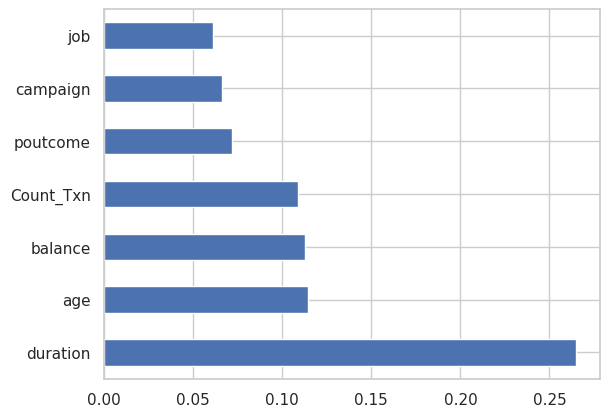

In [95]:
#plot important features
feat_imps=pd.Series(model.feature_importances_,index=X.columns)
feat_imps.nlargest(7).plot(kind='barh')
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=7)

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [98]:
y_pred = rf.predict(X_test)

In [99]:
def metric_calc(true,predicted):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred) 
    f1=f1_score(y_test,y_pred) 
    return precision,recall,accuracy,f1

In [100]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

precision,recall,accuracy,f1_score = metric_calc(y_test, y_pred)
print("Accuracy:", accuracy,"precision:",precision,"recall:",recall,"F1 score:",f1_score)

Accuracy: 0.9026656343324854 precision: 0.6284779050736498 recall: 0.3702989392478303 F1 score: 0.46601941747572817


7777


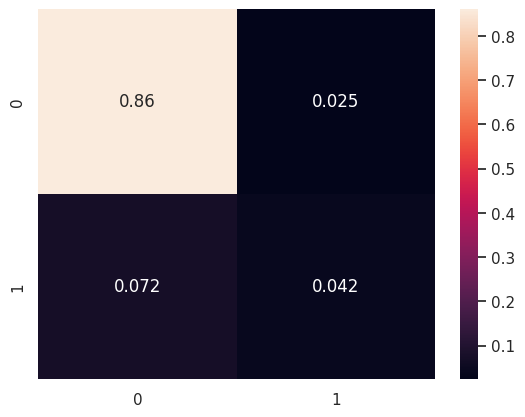

In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm[0][0])
sns.heatmap(cm/np.sum(cm),annot=True)
labels = ['True Neg','False Pos','False Neg','True Pos']

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=150)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

# Evaluate each model
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Logistic Regression Metrics:
Accuracy: 0.8867
Precision: 0.5868
Recall: 0.2192
F1 Score: 0.3191

Decision Tree Metrics:
Accuracy: 0.8542
Precision: 0.4016
Recall: 0.4155
F1 Score: 0.4084

Random Forest Metrics:
Accuracy: 0.8976
Precision: 0.6348
Recall: 0.3635
F1 Score: 0.4623

SVM Metrics:
Accuracy: 0.8892
Precision: 0.6227
Recall: 0.2155
F1 Score: 0.3202

KNN Metrics:
Accuracy: 0.8832
Precision: 0.5299
Recall: 0.3160
F1 Score: 0.3959

XGBoost Metrics:
Accuracy: 0.8945
Precision: 0.5951
Recall: 0.4027
F1 Score: 0.4804



In [103]:
# Assuming feat_imps is your feature importances Series
top_features = feat_imps.nlargest(7).index

# Select only the top features from your original dataset
X_top = X[top_features]

# Now, you can use X_top for training and prediction
# For example, if you have a RandomForestClassifier model:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier on the top features
model = RandomForestClassifier(n_estimators=150)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8953655569074217
